In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import seaborn as sns
%matplotlib inline

#Read in the iris dataset.
iris = pd.read_csv("iris.csv")

#Drop the ID column.
iris.drop("Id", axis=1, inplace=True)

In [2]:
#Select two features to use in the exercise.
X = iris[["PetalLengthCm", "PetalWidthCm"]].values

In [3]:
#Define the sklearn StandardScaler as scaler.
scaler = StandardScaler()
#Scale and it the data.
X = scaler.fit_transform(X)

In [4]:
#Define the linkage methods and distance metrics that I want to use.
linkage_methods = ["single", "complete"]
distance_metrics = ["euclidean", "cityblock"]

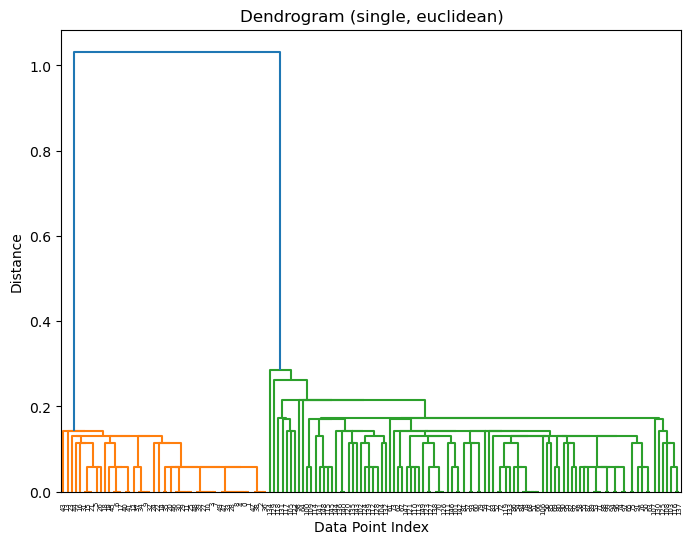

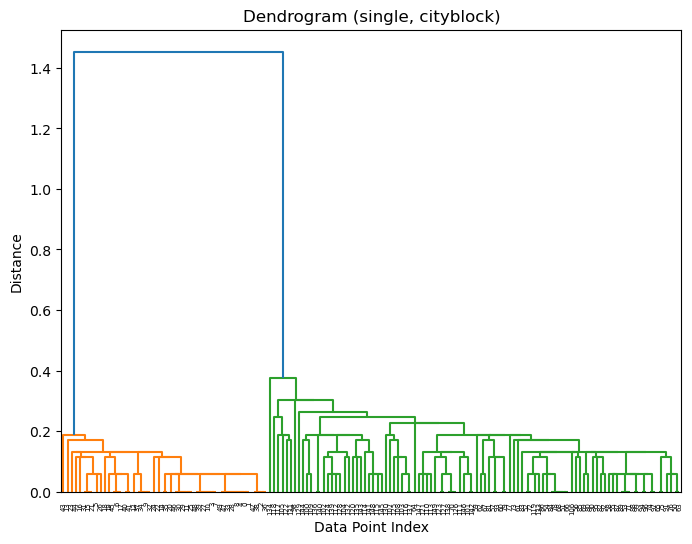

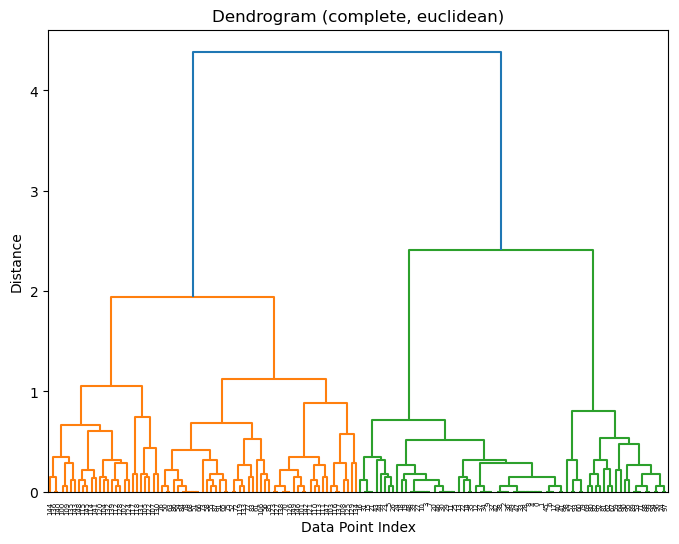

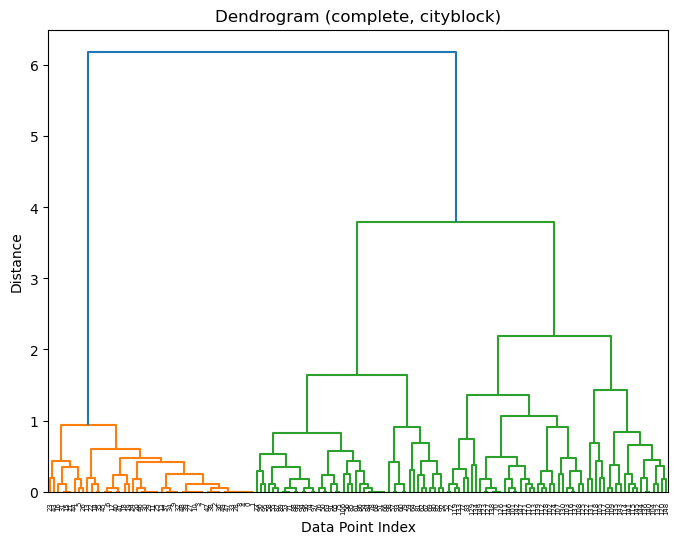

In [9]:
#Loop through the combinations of the linkage methods and the distance metrics.
for i in linkage_methods:
    for j in distance_metrics:
        #Create a linkage matrix, the linkage method is i and the distance metric is j.
        mx = linkage(X, method=i, metric=j)
        
        #Define a plot.
        plt.figure(figsize=(8,6))
        #Plot the dendrogram.
        dendrogram(mx)
        #Label the plot.
        plt.title(f"Dendrogram ({i}, {j})")
        #Label the x axis.
        plt.xlabel("Data Point Index")
        #Label the y axis.
        plt.ylabel("Distance")

#             Dendogram  Complete Euclidean
           This is the Dendogram I will go forward with because I like it!

In [ ]:
#Using an elbow plot to determine the number of clusters using the central point of the clusters; centroid.
from scipy.cluster.hierarchy import linkage, fcluster


#Perform hierarchcal clustering with complete linkage and euclidean distance.
Z = linkage(X, method="complete", metric="euclidean")


In [13]:
#Calculate the within-cluster sum of squares for different numbers of clusters.

#Empty list  to store the sums.
wcss = []
#For loop to iterate through the different number of clusters.
for i in range(1, 11):
    #Assign the clusters using the fcluster function.
    clusters = fcluster(Z, t=i, criterion='maxclust')
    #Emprty list to store each cluster from the centroids.
    centroids = []
    #Loop through each cluster and calculate its centroid
    for c in range(1, i+1):
        #Calc the mean of the data points with the data in the current cluster and store it as the centroid.
        centroids.append(X[clusters == c].mean(axis=0))
    #Create an empty array to store the cluster centroids.
    cluster_centroids = np.zeros_like(X)
    #Loop through the unique cluster labels and assign the corresponding centroids to the cluster centroids array.
    for c in np.unique(clusters):
        cluster_centroids[clusters == c] = centroids[c-1]
    #Calculate the wcss and append it to the list.
    wcss.append(np.sum((X - cluster_centroids)**2))


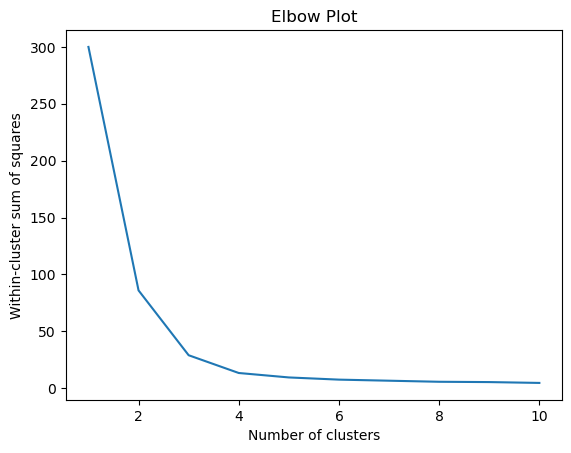

In [14]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Plot')
plt.show()

The elbox of the plot is around 3 clusters so I will will set the number of clusters to 3.

In [17]:
#Perform hierarchcal clustering with complete linkage and euclidean distance.
Z = linkage(X, method="complete", metric="euclidean")
#Define number of clusters.
n_clusters = 3

#Define labels from an array of zeros the same length as the number of rows in the x array.
labels = np.zeros(X.shape[0])
#Iterate through each row of the x array.
for i in range(X.shape[0]-1):
    #Define cluster.
    cluster = i
    #While loop until the parent cluster is reached, and the index is defined.
    while Z[cluster, 0] >= X.shape[0]:
        cluster = int(Z[cluster, 0]) - X.shape[0]
    labels[i] = cluster

#Evaluate the quality of the clustering using the silhouette score.
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette score: {silhouette_avg}')

Silhouette score: -0.4497810745472657


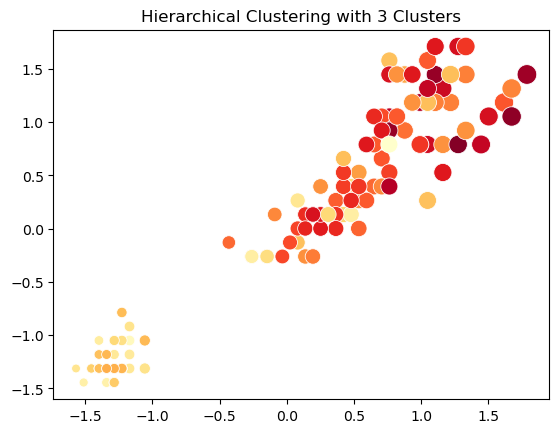

In [27]:
#Plot a scatterplot of the clustered data.
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="YlOrRd", legend=False, size=X[:, 0], sizes=(40,200) )
#Give the plot a title.
plt.title("Hierarchical Clustering with 3 Clusters")
